<a href="https://colab.research.google.com/github/kassymkhan0101/mlcourseai.demoassgn2/blob/master/demoassng2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import all required modules
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [0]:
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [340]:
df = pd.read_csv('mlbootcamp5_train.csv', delimiter=';')
print('Dataset size: ', df.shape)
df.head()

Dataset size:  (70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


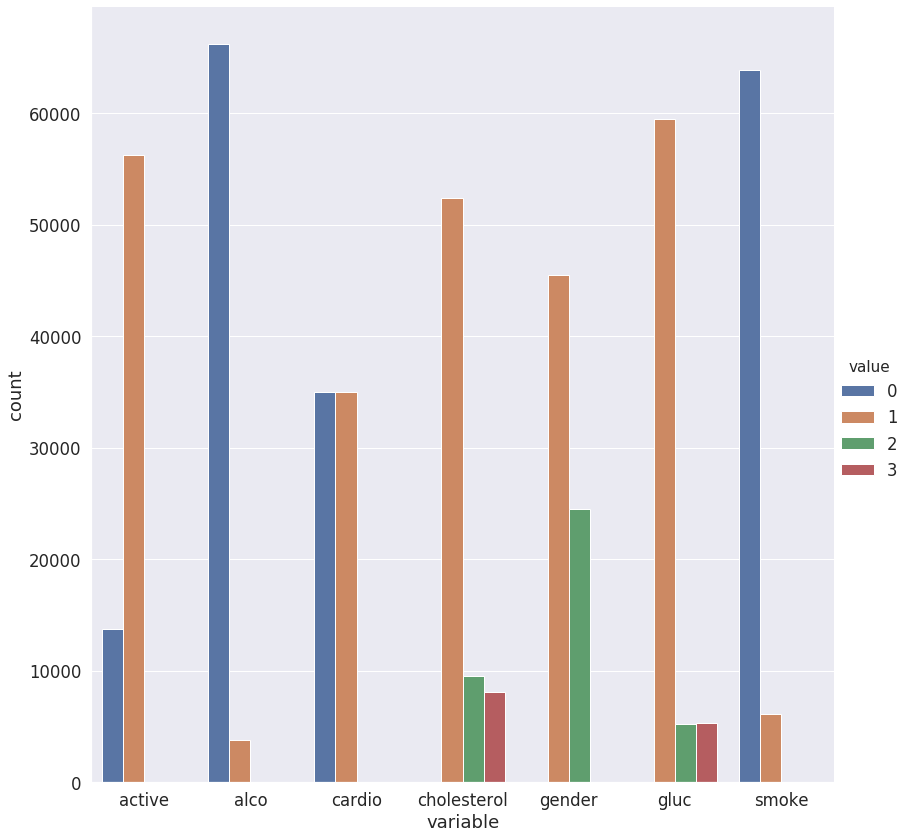

In [341]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active', 'cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 
                                              'value'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               data=df_uniques, kind='bar', size=12);

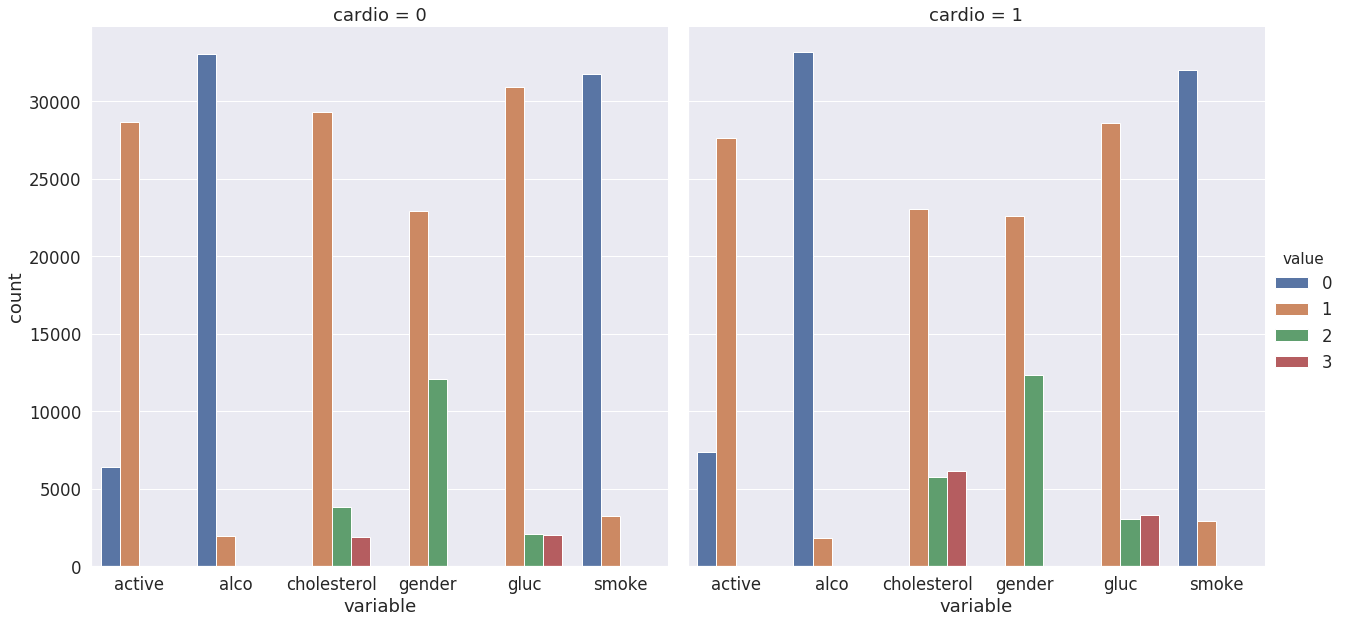

In [342]:
df_uniques = pd.melt(frame=df, value_vars=['gender','cholesterol', 
                                           'gluc', 'smoke', 'alco', 
                                           'active'], 
                     id_vars=['cardio'])
df_uniques = pd.DataFrame(df_uniques.groupby(['variable', 'value', 
                                              'cardio'])['value'].count()) \
    .sort_index(level=[0, 1]) \
    .rename(columns={'value': 'count'}) \
    .reset_index()

sns.factorplot(x='variable', y='count', hue='value', 
               col='cardio', data=df_uniques, kind='bar', size=9);

In [343]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * '-')

id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


Question 1.1. (1 point). How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

In [344]:
df.groupby(['gender'])['height'].agg([np.mean])

,mean
gender,
1,161.355612
2,169.947895


45530 women and 24470 men, since women are shorter than men and gender data has following:  [(1, 45530), (2, 24470)]

Question 1.2. (1 point). Which gender more often reports consuming alcohol - men or women?

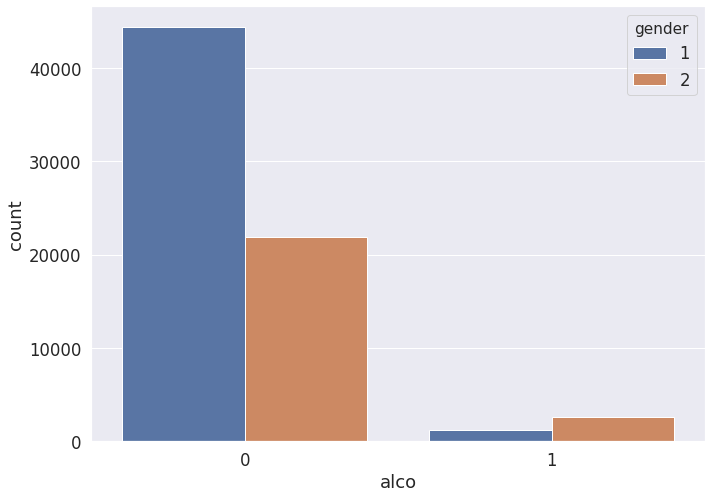

In [345]:
sns.countplot(x='alco', hue='gender', data=df);

According to countplot gender = 2, men, more reports consuming alco

Question 1.3. (1 point). What is the difference between the percentages of smokers among men and women (rounded)?

In [346]:
df.groupby(['gender'])['smoke'].value_counts(normalize = True)

gender  smoke
1       0        0.982144
        1        0.017856
2       0        0.781120
        1        0.218880
Name: smoke, dtype: float64

According to table above, it is 20%

Question 1.4. (1 point). What is the difference between median values of age for smokers and non-smokers (in months, rounded)? You'll need to figure out the units of feature age in this dataset.

In [347]:
df.groupby('smoke')['age'].median() / 365.25

smoke
0    53.995893
1    52.361396
Name: age, dtype: float64

In [348]:
(df[df['smoke'] == 0]['age'].median() - 
 df[df['smoke'] == 1]['age'].median()) / 365.25 * 12

19.613963039014372

the answer is 20 months

Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?

In [0]:
df['age_years'] = (df['age'] / 365.25).round().astype('int')

In [0]:
smoking_old_men = df[(df['gender'] == 2) & (df['age_years'] >= 60)
                    & (df['age_years'] < 65) & (df['smoke'] == 1)]

In [351]:
smoking_old_men[(smoking_old_men['cholesterol'] == 1) &
               (smoking_old_men['ap_hi'] < 120)]['cardio'].mean()

0.2631578947368421

In [352]:
smoking_old_men[(smoking_old_men['cholesterol'] == 3) &
               (smoking_old_men['ap_hi'] >= 160) &
               (smoking_old_men['ap_hi'] < 180)]['cardio'].mean()

0.8636363636363636

As a result, the difference is approximately 3-fold.

Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilogramms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25.

In [353]:
df['bmi'] = df['weight']/np.power(df['height']/100, 2)
df['bmi'].median()


26.374068120774975

In [354]:
df.groupby('gender')['bmi'].mean()

gender
1    27.987583
2    26.754442
Name: bmi, dtype: float64

In [355]:
df.groupby(['gender', 'alco', 'cardio'])['bmi'].median().to_frame()

bmi
gender alco cardio           
1      0    0       25.654372
            1       27.885187
       1    0       27.885187
            1       30.110991
2      0    0       25.102391
            1       26.674874
       1    0       25.351541
            1       27.530797

Question 1.6. (2 points). Choose the correct statements:



1.   Median BMI in the sample is within the range of normal BMI values. FALSE.
2.   The BMI for women is on average higher than for men. TRUE
3.   
Healthy people have, on average, a higher BMI than the people with CVD. FALSE
4.   For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women. TRUE









Task:
We can see that the data is not perfect. It contains "dirt" and inaccuracies. We'll see this better as we visualize the data.

Filter out the following patient segments (we consider these as erroneous data)

diastolic pressure is higher than systolic

height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)

height is strictly more than 97.5 percentile

weight is strictly less than 2.5 percentile

weight is strictly more than 97.5 percentile

This is not everything that we can do to clean this data, but this is sufficient for now.

In [0]:
cleandata = df[(df['ap_lo'] <= df['ap_hi']) & (df['weight'] >= df['weight'].quantile(.025)) & (df['weight'] <= df['weight'].quantile(.975)) & (df['height'] >= df['height'].quantile(.025)) & (df['height'] <= df['height'].quantile(.975))]

Question 1.7. (2 points). What percent of the original data (rounded) did we throw away?

10

In [357]:
len(cleandata)/len(df)

0.9037

To understand the features better, you can create a matrix of the correlation coefficients between the features. 
Use the initial dataset (non-filtered).

Task:
Plot a correlation matrix using heatmap(). 
You can create the matrix using the standard pandas tools with the default parameters.

In [358]:
df.corr(method='pearson')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003048,-0.001377
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999089,0.085512
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.022905,-0.096529
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081349,-0.290642
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053574,0.762009
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020458,0.024852
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017603,0.035345
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154383,0.146270
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098443,0.101390
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047867,-0.027215


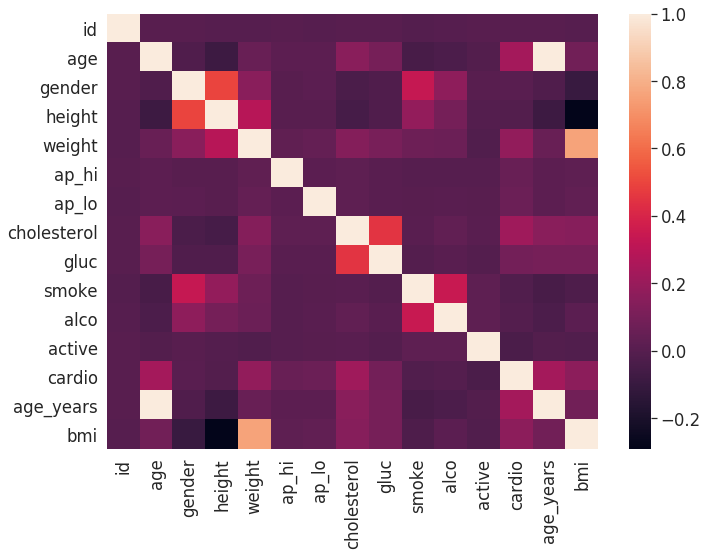

In [359]:
sns.heatmap(df.corr(method='pearson'))

Question 2.1. (1 point). Which pair of features has the strongest Pearson's correlation with the gender feature?

**Height, Smoke**

Create a violin plot for the height and gender using violinplot(). Use the parameters:


hue to split by gender;

scale to evaluate the number of records for each gender.

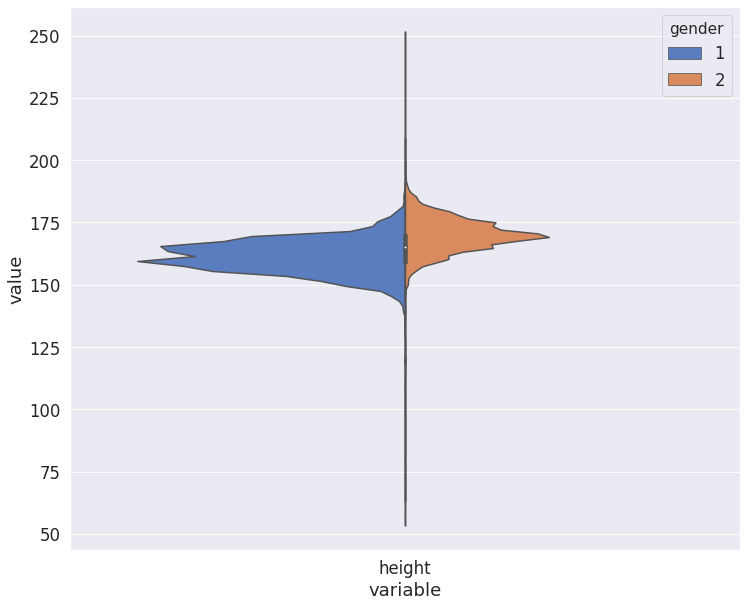

In [360]:
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])

plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable', 
    y='value', 
    hue='gender', 
    palette="muted", 
    split=True, 
    data=df_melt, 
    scale='count',
    scale_hue=False
)

Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

Height, Weight

Age, Weight

Cholesterol, Gluc

Cardio, Cholesterol

# **Ap_hi, Ap_lo**

Smoke, Alco

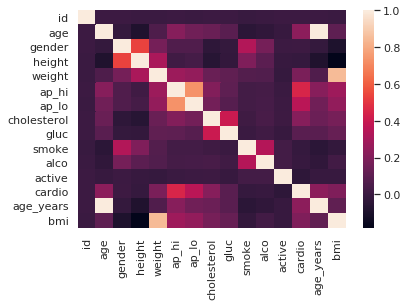

In [366]:
sns.heatmap(df.corr(method='spearman'))

Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

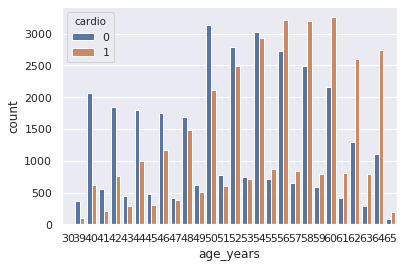

In [371]:
sns.countplot(x="age_years", hue='cardio', data=df);

Question 2.4. (1 point). What is the smallest age at which the number of people with CVD outnumber the number of people without CVD?

44

# **55**

64

70
